In [1]:
large_font = 14
plot_color = '#5596ce'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import math

In [3]:
which_search = 'search_03'

In [4]:
logfile_path = "all_log.txt"

# open the file:
with open(logfile_path, "r") as fd: # import the results file 
    logfile = fd.read().splitlines() # read in the results
    logfile_split = [] 
    for line in logfile:
        logfile_split.append(line.split()) # save each line to the list logfile_split
fd.close()

print("number of hits:", len(logfile_split))

number of hits: 93891


In [5]:
# what is in this logfile_split file?
print(f'Each line is a "hit".')
print(f'There are {len(logfile_split)} lines')
print(f'Each line has {len(logfile_split[0])} entries. Entries can include donor name, CDRH3, etc.')
print(f'Here is an example of what is in the first line:')

print(f'\t Donor:      {logfile_split[0][2]}')
print(f'\t Vgene:      {logfile_split[0][3]}')
print(f'\t Dgene:      {logfile_split[0][4]}')
print(f'\t Jgene:      {logfile_split[0][5]}')
print(f'\t CDRH3:      {logfile_split[0][8]}')

Each line is a "hit".
There are 93891 lines
Each line has 13 entries. Entries can include donor name, CDRH3, etc.
Here is an example of what is in the first line:
	 Donor:      Donor-3
	 Vgene:      IGHV2-26*01
	 Dgene:      IGHD4-17*01
	 Jgene:      IGHJ5*02
	 CDRH3:      ARFLEDDYGDYARCNWFDP


In [6]:
print(f'There are {len(logfile_split)} sequences')

IGHD_possible = ['IGHD1', 'IGHD2', 'IGHD3', 'IGHD4', 'IGHD5', 'IGHD6','IGHD7']

IGHD1 = [] 
IGHD2 = [] 
IGHD3 = [] 
IGHD4 = [] 
IGHD5 = [] 
IGHD6 = [] 
IGHD7 = [] 
for line in range(len(logfile_split)): # for each line 
    for entry in range(len(logfile_split[line])): # for each entry in each line
        if 'IGHD1' in logfile_split[line][entry]:
            IGHD1.append(1)
        if 'IGHD2' in logfile_split[line][entry]:
            IGHD2.append(1)
        if 'IGHD3' in logfile_split[line][entry]:
            IGHD3.append(1)
        if 'IGHD4' in logfile_split[line][entry]:
            IGHD4.append(1)
        if 'IGHD5' in logfile_split[line][entry]:
            IGHD5.append(1)
        if 'IGHD6' in logfile_split[line][entry]:
            IGHD6.append(1)
        if 'IGHD7' in logfile_split[line][entry]:
            IGHD7.append(1)

There are 93891 sequences


In [7]:
len(IGHD1)+len(IGHD2)+len(IGHD3)+len(IGHD4)+len(IGHD5)+len(IGHD6)+len(IGHD7)

93891

In [8]:
d = 'IGHD2'
d[4].isdigit()

True

In [9]:
# save out the donor names
donor_names = []
cdrh3_seqs  = []
full_seqs   = []
jgene = []
dgene = []

for line in range(len(logfile_split)): # for each line 
    for entry in range(len(logfile_split[line])): # for each entry in each line
        if logfile_split[line][entry].rfind("IGHV") == 0: # find which entry the Vgene is at 
            jgene.append(logfile_split[line][entry])
            dgene.append(logfile_split[line][entry+1])
            if 'csv' in logfile_split[line][entry-1]: # if a .csv file is right before the Vgene,
                donor_names.append("no_donor_name_found") # then this line has no donor name
            else: # if the .csv line is not right before the Vgene, 
                #jgene.append(logfile_split[line][entry+2])
                #jgene.append(logfile_split[line][entry+2])
                donor_names.append(logfile_split[line][entry-1]) # then save the reported donor name   
        #if logfile_split[line][entry].rfind("IGHD") == 0: # find which entry the Dgene is at 
        #    if str(logfile_split[line][entry][4]).isdigit() == True:
        #        dgene.append(logfile_split[line][entry])
        if logfile_split[line][entry].isdigit() == True:
            if int(logfile_split[line][entry]) == len(logfile_split[line][entry-1]):
                cdrh3_seqs.append(logfile_split[line][entry-1])     
    full_seqs.append(logfile_split[line][-2])

In [10]:
print(np.unique(dgene), len(dgene))

['IGHD1-1*01' 'IGHD1-26*01' 'IGHD1-7*01' 'IGHD2-15*01' 'IGHD2-2*01'
 'IGHD2-2*02' 'IGHD2-2*03' 'IGHD2-21*01' 'IGHD2-21*02' 'IGHD2-8*01'
 'IGHD3-10*01' 'IGHD3-16*01' 'IGHD3-16*02' 'IGHD3-22*01' 'IGHD3-3*01'
 'IGHD3-9*01' 'IGHD3/OR15-3a*01' 'IGHD4-11*01' 'IGHD4-17*01' 'IGHD4-23*01'
 'IGHD4-4*01' 'IGHD4/OR15-4a*01' 'IGHD5-12*01' 'IGHD5-18*01' 'IGHD5-24*01'
 'IGHD6-13*01' 'IGHD6-19*01' 'IGHD6-25*01' 'IGHD6-6*01'] 93891


In [11]:
dgenes_unique = np.unique(dgene)
dgene_counts = []
for d in range(len(dgenes_unique)):
    counter = []
    for i in range(len(dgene)):
        if dgene[i] == dgenes_unique[d]:
            #print(jgene[i], jgenes_unique[j])
            counter.append(1)
    dgene_counts.append(sum(counter))

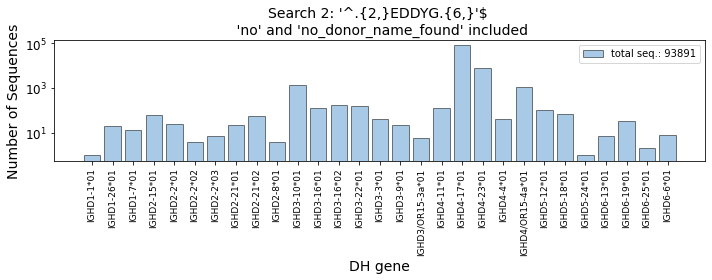

In [12]:
plt.figure(figsize=[10,4])
plt.bar(dgenes_unique,dgene_counts, label=f'total seq.: {len(np.concatenate([dgene]))}',color = plot_color, edgecolor="black", alpha=0.5)
plt.xticks(fontsize=9, rotation=90)
plt.ylabel("Number of Sequences",  fontsize=14)
plt.yscale("log")
plt.yticks(fontsize=12)
plt.xlabel("DH gene", fontsize=14)
plt.legend(markerscale=0.6) 
#plt.title(f"Expanded search {which_search}: Vgene, +/- 4", fontsize=14)
plt.title("Search 2: '^.{2,}EDDYG.{6,}'$ \n 'no' and 'no_donor_name_found' included", fontsize=14)
plt.tight_layout()
plt.savefig("DHgene_distribution.pdf", dpi=500)
plt.show()

In [13]:
sum(dgene_counts)

93891

In [14]:
np.save("EDDYG_search_dgenes_with_no_and_noname", np.array(dgene_counts)/93891)

In [15]:
len(dgenes_unique)

29

In [16]:
# 05292024 getting a list of d genes so that I can search the OAS database for each one: 
"IGHD1-1.01" "IGHD1-26.01" "IGHD1-7.01" "IGHD2-15.01" "IGHD2-2.01" "IGHD2-2.02" "IGHD2-2.03" "IGHD2-21.01" "IGHD2-21.02" "IGHD2-8.01" "IGHD3-10.01" "IGHD3-16.01" "IGHD3-16.02" "IGHD3-22.01" "IGHD3-3.01" "IGHD3-9.01" "IGHD3/OR15-3a.01" "IGHD4-11.01" "IGHD4-17.01" "IGHD4-23.01" "IGHD4-4.01" "IGHD4/OR15-4a.01" "IGHD5-12.01" "IGHD5-18.01" "IGHD5-24.01" "IGHD6-13.01" "IGHD6-19.01" "IGHD6-25.01" "IGHD6-6.01"

#93891
    

'IGHD1-1.01IGHD1-26.01IGHD1-7.01IGHD2-15.01IGHD2-2.01IGHD2-2.02IGHD2-2.03IGHD2-21.01IGHD2-21.02IGHD2-8.01IGHD3-10.01IGHD3-16.01IGHD3-16.02IGHD3-22.01IGHD3-3.01IGHD3-9.01IGHD3/OR15-3a.01IGHD4-11.01IGHD4-17.01IGHD4-23.01IGHD4-4.01IGHD4/OR15-4a.01IGHD5-12.01IGHD5-18.01IGHD5-24.01IGHD6-13.01IGHD6-19.01IGHD6-25.01IGHD6-6.01'

In [17]:
import numpy as np
import matplotlib.pyplot as plt

specific_d_genes = ["IGHD1-1*01","IGHD1-26*01","IGHD1-7*01","IGHD2-15*01","IGHD2-2*01","IGHD2-2*02","IGHD2-2*03","IGHD2-21*01","IGHD2-21*.02","IGHD2-8*01","IGHD3-10*01","IGHD3-16*01","IGHD3-16*.02","IGHD3-22*01","IGHD3-3*01","IGHD3-9*01","IGHD3/OR15-3a*01","IGHD4-11*01","IGHD4-17*01","IGHD4-23*01","IGHD4-4*01","IGHD4/OR15-4a*01","IGHD5-12*01","IGHD5-18*01","IGHD5-24*01","IGHD6-13*01","IGHD6-19*01","IGHD6-25*01","IGHD6-6*01"]


# load in the search data results:
numerator = np.load('EDDYG_search_dgenes_with_no_and_noname.npy')

sample_data_path = '/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/gene_counts/IGHD/specific_genes/final_dgenes_counts_output.txt'

with open(sample_data_path) as f:
    lines = [line.rstrip() for line in f]
    
bar_plot_data = []
for line in lines:
    split_line = line.split(" ")
    bar_plot_data.append(int(split_line[1]))

#print(f'tracking progress: {np.sum(bar_plot_data)/1000000} million')
total_seqs_in_OAS = 1525390191
denominator = np.array(bar_plot_data)/total_seqs_in_OAS

In [18]:
plt.figure(figsize=[20,8])
plt.ylabel('enrichment', fontsize=16, weight='bold')
plt.bar(specific_d_genes, numerator/denominator, color='#5596ce', edgecolor='k')
plt.xticks(fontsize=14, rotation=80, weight='bold')
plt.title('enrichment plot', fontsize=16, weight='bold')
plt.yscale('log')
plt.
plt.tight_layout()
plt.savefig("enrichment_plot.pdf", dpi=300)
plt.close()

In [35]:
plt.figure(figsize=[16,6])
plt.ylabel('Enrichment Score', fontsize=18, weight='bold')
plt.bar(specific_d_genes, np.log10(numerator/denominator), color='#5596ce', edgecolor='k', linewidth=5)
plt.xticks(fontsize=14, rotation=80, weight='bold')
plt.title("enrichment plot \nSearch 2: '^.{2,}EDDYG.{6,}$' all CDRH3 lengths \n including no and no name", fontsize=18, weight='bold')
#plt.yscale('log')
plt.yticks(fontsize=14)
#plt.ylim(-5,5)
plt.tight_layout()
plt.savefig("log_enrichment_plot.pdf", dpi=300)
plt.close()

In [42]:
pwd

'/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/V033/updated_searches_05222024/search_03'

In [34]:
enrichment = np.log10(numerator/denominator)
positive_color='#5596ce'
negative_color='#dc6464'
colors = []
for i in range(len(enrichment)):
    if enrichment[i] <= 0:
        colors.append(negative_color)
    if enrichment[i] > 0:
        colors.append(positive_color)
        
plt.figure(figsize=[16,6])
plt.ylabel('Enrichment Score', fontsize=18, weight='bold')
plt.bar(specific_d_genes, np.log10(numerator/denominator), color=colors, edgecolor='k', linewidth=5)
plt.xticks(fontsize=14, rotation=80, weight='bold')
plt.title("enrichment plot \nSearch 2: '^.{2,}EDDYG.{6,}$' all CDRH3 lengths \n including no and no name", fontsize=18, weight='bold')
#plt.yscale('log')
plt.yticks(fontsize=14)
#plt.ylim(-5,5)
plt.tight_layout()
plt.savefig("log_enrichment_plot_2colors.pdf", dpi=300)
plt.close()

In [31]:
enrichment = np.log10(numerator/denominator)
positive_color='#5596ce'
negative_color='#dc6464'
colors = []
for i in range(len(enrichment)):
    if enrichment[i] <= 0:
        colors.append(negative_color)
    if enrichment[i] > 0:
        colors.append(positive_color)

In [32]:
colors

['#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#5596ce',
 '#dc6464',
 '#5596ce',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#5596ce',
 '#5596ce',
 '#5596ce',
 '#dc6464',
 '#5596ce',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464',
 '#dc6464']